# Example usage of snspec

In [1]:
import snspec
import numpy as np
import matplotlib.pyplot as plt

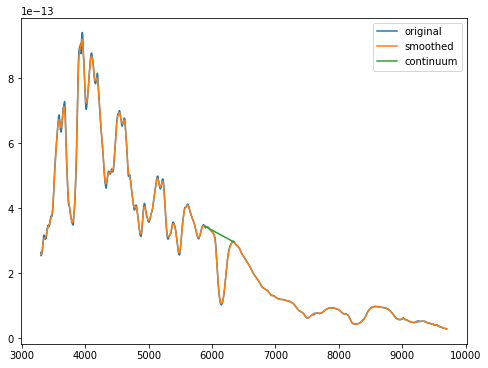

In [2]:
demo_spec = snspec.spectrum(*list(zip(*np.loadtxt('./test_spec.txt')))) # read in demo data and create a spectrum object.
demo_spec.smooth(order=3) # Smooth spectrum
demo_spec.find_continuum(min_range=[5820, 6000], max_range=[6200, 6540], binsize=40) # find continuum given wavelength range of endpoints


fig,ax = plt.subplots(figsize=(8,6))
# plot orginal and smoothed spectra
ax.plot(demo_spec.wavelength, demo_spec.flux, label='original')
ax.plot(demo_spec.wavelength, demo_spec.smoothed_flux, label='smoothed')
ax.plot(*list(zip(demo_spec.cont_min, demo_spec.cont_max)), label='continuum')
ax.legend()